In [1]:
# import basic libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
# avoiding warnings display
warnings.filterwarnings('ignore')

In [3]:
# load datasets
df = pd.read_csv('C:\\PythonClass\\Data Science\\Datasets\\movies.csv')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [4]:
df.drop('index',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       99 non-null     object 
 1   year_of_release  99 non-null     object 
 2   category         99 non-null     object 
 3   run_time         99 non-null     object 
 4   genre            99 non-null     object 
 5   imdb_rating      99 non-null     float64
 6   votes            99 non-null     object 
 7   gross_total      98 non-null     object 
dtypes: float64(1), object(7)
memory usage: 6.3+ KB


In [6]:
df.isnull().sum()

movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [7]:
# Printing rows with missing value in gross_total
df[df['gross_total'].isnull()==True]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,"35,528",NaN


In [8]:
df[60:70]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
60,The Lives of Others,(2006),R,137 min,"Drama, Mystery, Thriller",8.4,"391,480",$11.29M
61,The Prestige,(2006),PG-13,130 min,"Drama, Mystery, Sci-Fi",8.5,"1,336,235",$53.09M
62,V for Vendetta,(2005),R,132 min,"Action, Drama, Sci-Fi",8.2,"1,125,038",$70.51M
63,Chinatown,(1974),R,130 min,"Drama, Mystery, Thriller",8.2,"329,110",$8.49M
64,City of God,(2002),R,130 min,"Crime, Drama",8.6,"758,914",$7.56M
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,"35,528",NaN
66,Fargo,(1996),R,98 min,"Crime, Thriller",8.1,"681,256",$24.61M
67,Life of Pi,(2012),PG,127 min,"Adventure, Drama, Fantasy",7.9,"634,357",$124.99M
68,Slumdog Millionaire,(2008),R,120 min,"Crime, Drama, Romance",8.0,"848,344",$141.32M
69,Vertigo,(1958),PG,128 min,"Mystery, Romance, Thriller",8.3,"404,626",$3.20M


In [9]:
# Printing rows which have rating equal to the rating in the 65th rows (row with missing value)
df[df['imdb_rating']==7.8]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,"35,528",NaN
79,Star Wars: Episode VII - The Force Awakens,(2015),PG-13,138 min,"Action, Adventure, Sci-Fi",7.8,"933,771",$936.66M
80,The Hobbit: The Desolation of Smaug,(2013),PG-13,161 min,"Adventure, Fantasy",7.8,"667,864",$258.37M
91,The Insider,(1999),R,157 min,"Biography, Drama, Thriller",7.8,"172,759",$28.97M


In [ ]:
#Here We can see that missed value can't be guessed using imdb_rating, 
#because in the above output I have printed all records with exact rating but 
#their corresponding gross earning varies so drastically. 
#There appear no mathematical or logical correlation between them.
#Now I will try to print nearby votes and try to make conclusion how voting is related to gross_total

In [10]:
# first I need to convert data type from 'object' to 'int'
df['votes']=df['votes'].str.replace(',','')
df['votes']=df['votes'].astype(int)
# sorting by votes
sorted_votes=df.sort_values(by='votes',ascending=True)
# printing recording having less than 40k votes, since missed record has around 35k votes
sorted_votes[sorted_votes['votes']<=40000]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
48,Avanti!,(1972),R,144 min,"Comedy, Romance",7.2,10748,$3.30M
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,35528,NaN


In [ ]:
#Only 2 records found in this range lets expand the range to see nearby votes and related records

In [11]:
sorted_votes[sorted_votes['votes']<=250000]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
48,Avanti!,(1972),R,144 min,"Comedy, Romance",7.2,10748,$3.30M
65,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,35528,NaN
89,The Piano,(1993),R,121 min,"Drama, Music, Romance",7.5,89819,$40.16M
91,The Insider,(1999),R,157 min,"Biography, Drama, Thriller",7.8,172759,$28.97M
73,The Third Man,(1949),Approved,93 min,"Film-Noir, Mystery, Thriller",8.1,173206,$0.45M
95,Cool Hand Luke,(1967),GP,127 min,"Crime, Drama",8.1,178888,$16.22M
97,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,186059,$0.02M
29,The Bridge on the River Kwai,(1957),PG,161 min,"Adventure, Drama, War",8.2,222540,$44.91M
51,Modern Times,(1936),G,87 min,"Comedy, Drama, Romance",8.5,244162,$0.16M
41,Singin' in the Rain,(1952),G,103 min,"Comedy, Musical, Romance",8.3,244548,$8.82M


In [ ]:
# Obviusly there is no clear correlation, 
# because even a moving having 244162 votes at index 51 has almost zero million dollar gross_total, 
# similar at index 97 its almost zero gross_total. 
# Also the movie with missed record is the second least voted movie as found by sorting votes column. 
# So its better to fill it with zero.

In [12]:
# filling missing value 
df.fillna(0,inplace=True)
df.isnull().sum()

movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        0
dtype: int64

# Data Visualization

Category

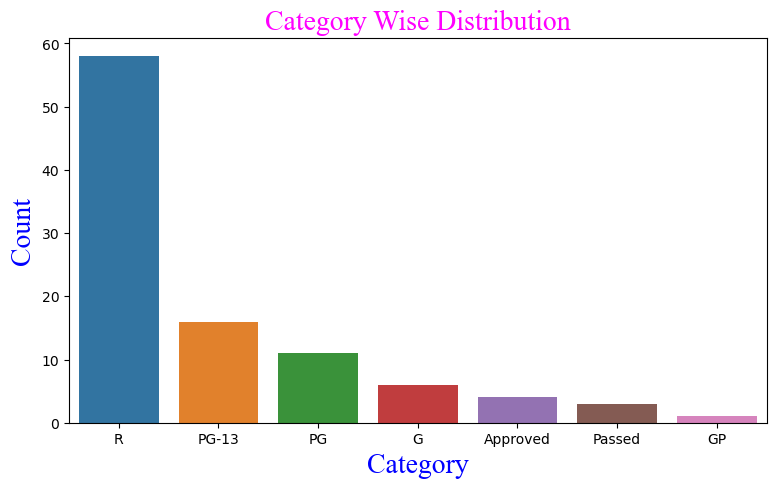

In [13]:
category=df['category'].value_counts(ascending=False)
name=category.index
count=category.values

# bar plot
plt.figure(figsize=(9,5))
sns.barplot(x=name, y=count)
plt.title('Category Wise Distribution',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xlabel('Category',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.ylabel('Count',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.show()

# Which categories has earned the most
First we need to change data type of gross_total to 'float' type
So that mathematical function can be applied to get insights

In [14]:
df['gross_total'][0:3]

0    $134.97M
1    $130.74M
2    $290.48M
Name: gross_total, dtype: object

In [15]:
# replacing non numeric character with empty string
df['gross_total']=df['gross_total'].str.replace('$','')
df['gross_total']=df['gross_total'].str.replace('M','')

In [16]:
df['gross_total']

0     134.97
1     130.74
2     290.48
3      28.34
4      44.02
       ...  
94     23.34
95     16.22
96     34.40
97      0.02
98    171.48
Name: gross_total, Length: 99, dtype: object

In [17]:
# converting data type 
try:
    df= df.astype({'gross_total':float})
except:
     print('ValueError: could not convert')

In [18]:
df['gross_total'].dtypes

dtype('float64')

In [20]:
# Lets group the data together

cat_gross=df.groupby('category')['gross_total'].sum()
cat_gross

category
Approved      24.19
G            695.18
GP            16.22
PG          1593.59
PG-13       4697.41
Passed       223.68
R           4257.53
Name: gross_total, dtype: float64

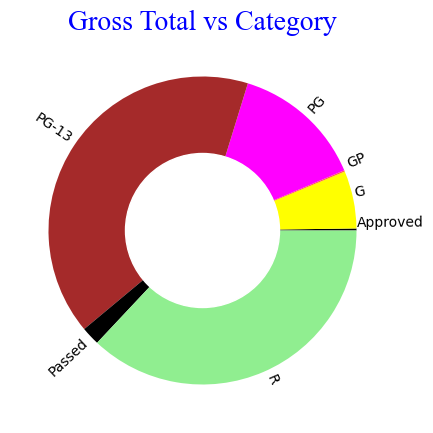

In [21]:
# pie plot
name=cat_gross.index
value=cat_gross.values

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Gross Total vs Category",fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.pie(x=value,labels=name,rotatelabels=90,labeldistance=1.0,colors=['black','yellow','tomato','magenta','brown','black','lightgreen'])
fig=plt.gcf()
cc=plt.Circle((0,0),0.5,color='white')
fig.gca().add_artist(cc);

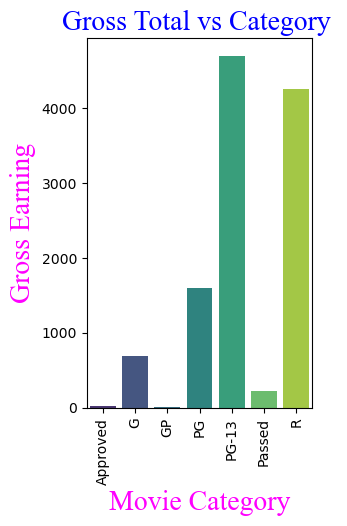

In [22]:
plt.subplot(122)
sns.barplot(x=name,y=value,palette='viridis')
plt.title('Gross Total vs Category ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Movie Category',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('Gross Earning',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

Above are two different graphs to show the same distribution, We can see that Category PG-13 Has gained the most Gross Earning, altough Categories R has 58 movies while there are only 16 movies are under PG-13 category.

In [23]:
# No of movies per categories
category

R           58
PG-13       16
PG          11
G            6
Approved     4
Passed       3
GP           1
Name: category, dtype: int64

Year

In [24]:
df['year_of_release'].sample(5)

46    (1968)
73    (1949)
82    (2013)
96    (2004)
94    (1995)
Name: year_of_release, dtype: object

In [25]:
# Replacing parenthesis with empty string
df['year_of_release']=df['year_of_release'].str.replace('(','')
df['year_of_release']=df['year_of_release'].str.replace(')','')

# Changing datatype of 'year_of_release'
df['year_of_release']=df['year_of_release'].astype(int)
df['year_of_release'].sample(5)

77    1999
50    2001
32    1954
66    1996
74    1995
Name: year_of_release, dtype: int32

In [26]:
df['year_of_release'].dtype

dtype('int32')

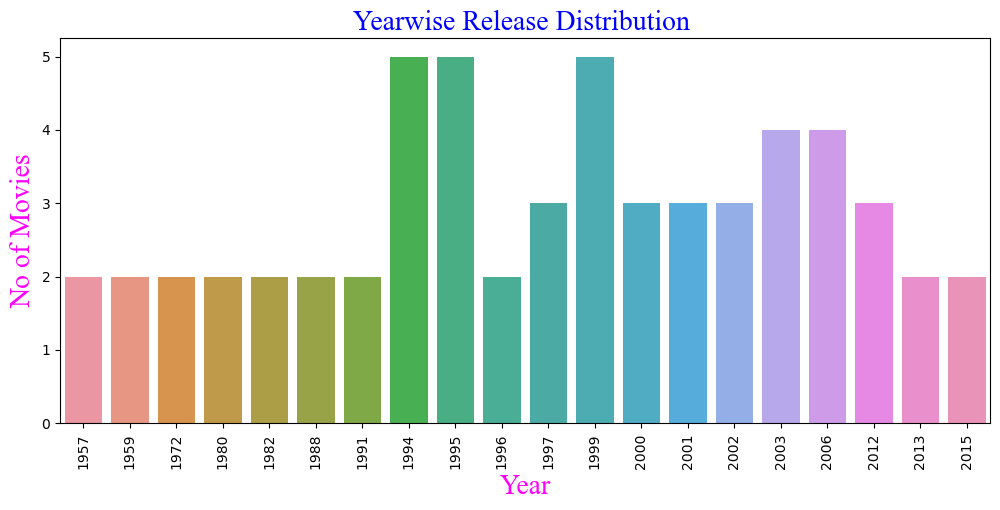

In [27]:
year=df['year_of_release'].value_counts(ascending=False).head(20)
name=year.index
count=year.values

plt.figure(figsize=(12,5))
sns.barplot(x=name,y=count)
plt.title('Yearwise Release Distribution ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Year',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('No of Movies',fontdict={'family':'times new roman','size':20,'color':'magenta'});

In the above graph we can see that,years 1994,1995 and 1999 has most number of hit releases e.g. 5 movies in each year.

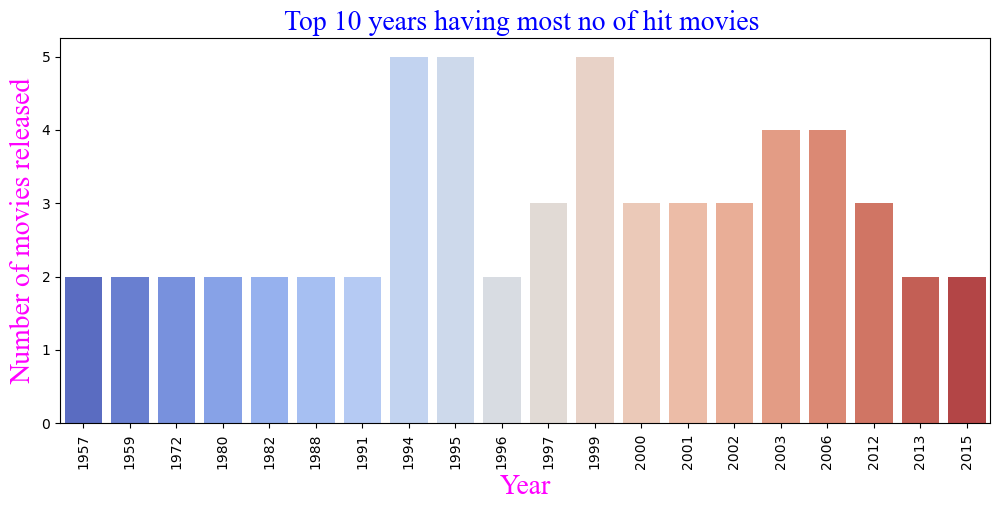

In [29]:
# Years with maximum release of movies
plt.figure(figsize=(12,5))
sns.barplot(x=name,y=count,palette='coolwarm')
plt.title('Top 10 years having most no of hit movies ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Year',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('Number of movies released',fontdict={'family':'times new roman','size':20,'color':'magenta'});

Year 1995,1994,1999 had most number of hit movies

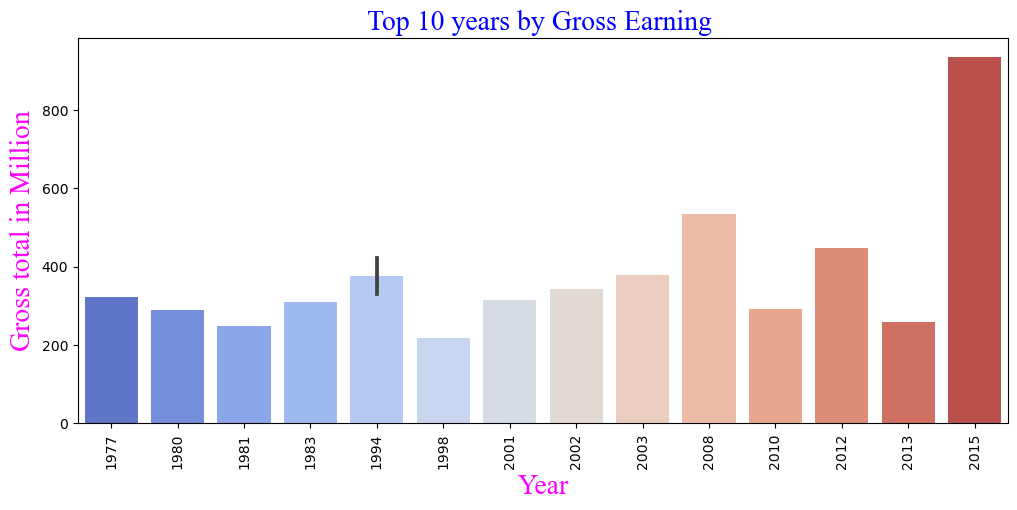

In [30]:
# which year produced top grossing movies

top_year_by_gross=df.sort_values(by='gross_total',ascending=False).head(15)[['year_of_release','gross_total']]
name=top_year_by_gross['year_of_release']
value=top_year_by_gross['gross_total']
# bar plot
plt.figure(figsize=(12,5))
sns.barplot(x=name,y=value,palette='coolwarm')
plt.title('Top 10 years by Gross Earning ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Year',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('Gross total in Million',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

2015 has the highest gross earning

Runtime

In [31]:
# lets first convert clearn and convert data type of run_time

df['run_time']=df['run_time'].str.replace('min','')
df = df.astype({'run_time':int})

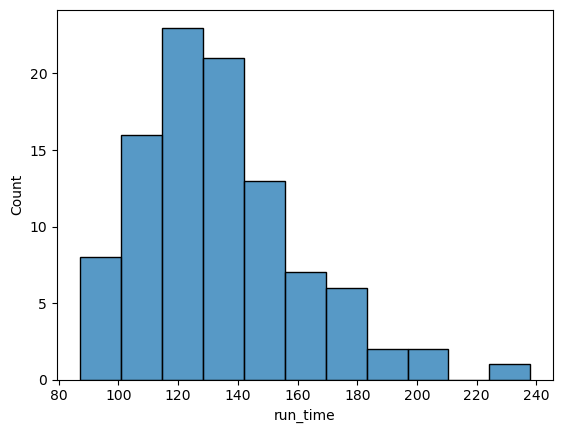

In [32]:
sns.histplot(df['run_time']);

Most movies(around 28) have runtime of 120 minutes, than around 20 movies have runtime of 140 min and so on

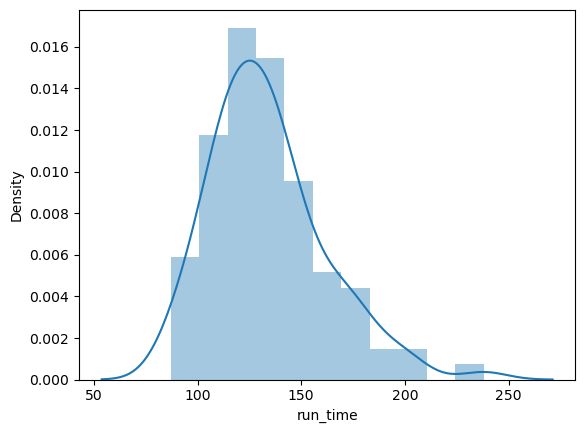

In [33]:
sns.distplot(df['run_time']);

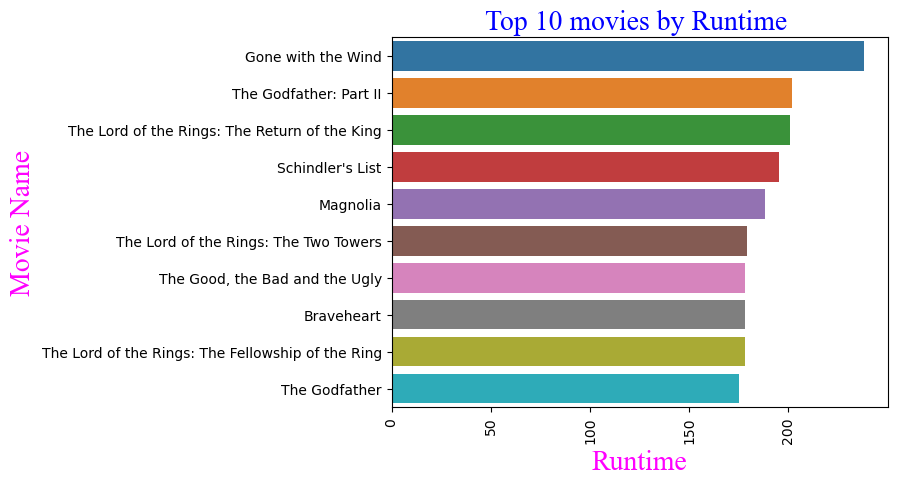

In [34]:
# Top movies by runtime length

runtime=df.sort_values(by='run_time',ascending=False).head(10)[['movie_name','run_time']]
sns.barplot(x='run_time',y='movie_name',data=runtime,seed=11)
plt.title('Top 10 movies by Runtime ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Runtime',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'});

Gone with the Wind is the movie with the higest runtime of 238 mins, then The Godfather: Part II having runtime of 202 min, then The Lord of the Rings: The Return of the King having 201 min of runtime, so on..

In [36]:
# what was the runtime of highest grossing movie

runtime=df.sort_values(by='gross_total',ascending=False)[['movie_name','run_time','gross_total']]
runtime[0:5]

,movie_name,run_time,gross_total
79,Star Wars: Episode VII - The Force Awakens,138,936.66
10,The Dark Knight,152,534.86
78,The Dark Knight Rises,164,448.14
30,The Lion King,88,422.78
8,The Lord of the Rings: The Return of the King,201,377.85


The highest grossing movie was Star Wars: Episode VII - The Force Awakens having 138 mins runtime and 936.66M USD gross earning. Then The Dark Knight having 152 mins runtime and 534.86M USD gross earning and so on

Genre

In [37]:
# top 10 Genre
genre=df['genre'].value_counts(ascending=False).head(10)
name=genre.index
count=genre.values
genre

Drama                         8
Crime, Drama                  7
Action, Crime, Drama          4
Action, Adventure, Sci-Fi     4
Biography, Drama, History     4
Comedy, Drama, Romance        4
Crime, Drama, Mystery         4
Action, Adventure, Fantasy    3
Crime, Drama, Thriller        3
Action, Adventure, Drama      3
Name: genre, dtype: int64

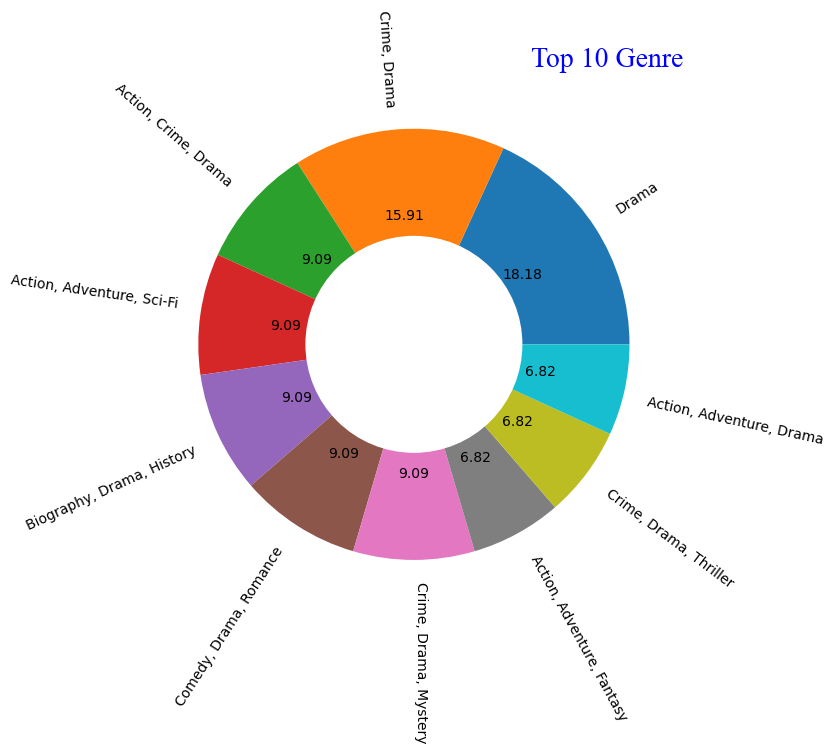

In [39]:
plt.figure(figsize=(7,7))
plt.pie(count,labels=name,rotatelabels=40,autopct='%1.2f')
cc=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.title("Top 10 Genre",loc='right',fontdict={'family':'times new roman','size':20,'color':'blue'});

In [40]:
# which Genre has the higest rating

genre_rating=df[['genre','imdb_rating']]
genre_rating=genre_rating.sort_values(by='imdb_rating',ascending=False).head(15)
genre_rating

,genre,imdb_rating
3,Drama,9.3
0,"Crime, Drama",9.2
13,"Biography, Drama, History",9.0
21,"Crime, Drama",9.0
8,"Action, Adventure, Drama",9.0
10,"Action, Crime, Drama",9.0
11,"Crime, Drama",9.0
28,"Crime, Drama",8.9
55,Drama,8.8
40,"Drama, Romance",8.8


From above data We can see that most of highly rated movies falls into 'Drama' or 'Crime' followed by action or adventure

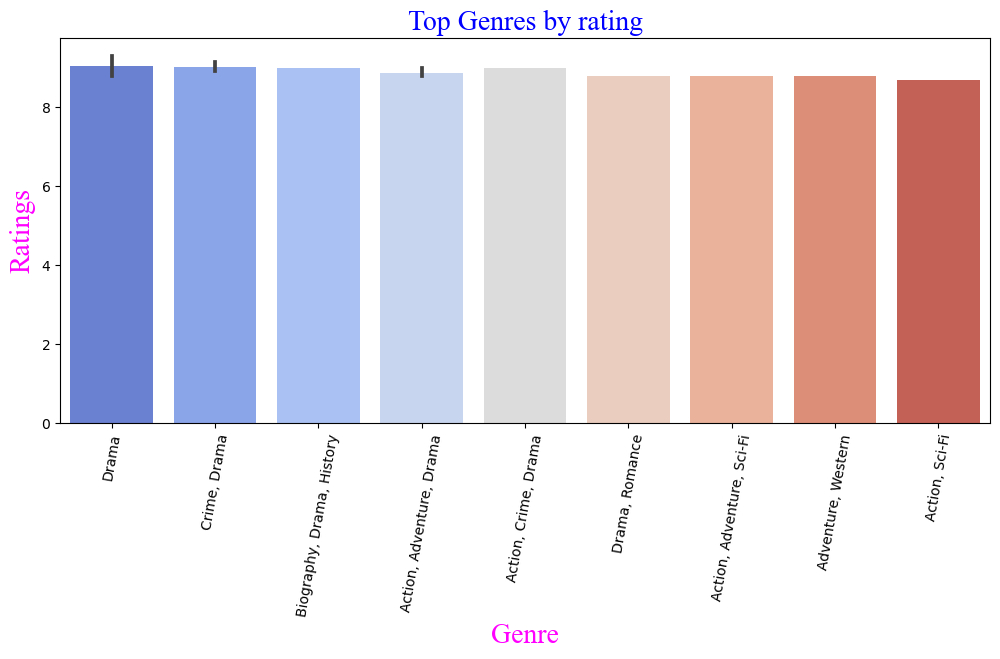

In [41]:
name=genre_rating['genre']
value=genre_rating['imdb_rating']

plt.figure(figsize=(12,5))
sns.barplot(x=name,y=value,palette='coolwarm')
plt.title('Top Genres by rating',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Genre',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=80)
plt.ylabel('Ratings',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

In [42]:
# higest rated movies

top_movie_ratings=df[['movie_name','imdb_rating']].sort_values(by='imdb_rating',ascending=False).head(10)
top_movie_ratings

,movie_name,imdb_rating
3,The Shawshank Redemption,9.3
0,The Godfather,9.2
13,Schindler's List,9.0
21,12 Angry Men,9.0
8,The Lord of the Rings: The Return of the King,9.0
10,The Dark Knight,9.0
11,The Godfather: Part II,9.0
28,Pulp Fiction,8.9
55,Fight Club,8.8
40,Forrest Gump,8.8


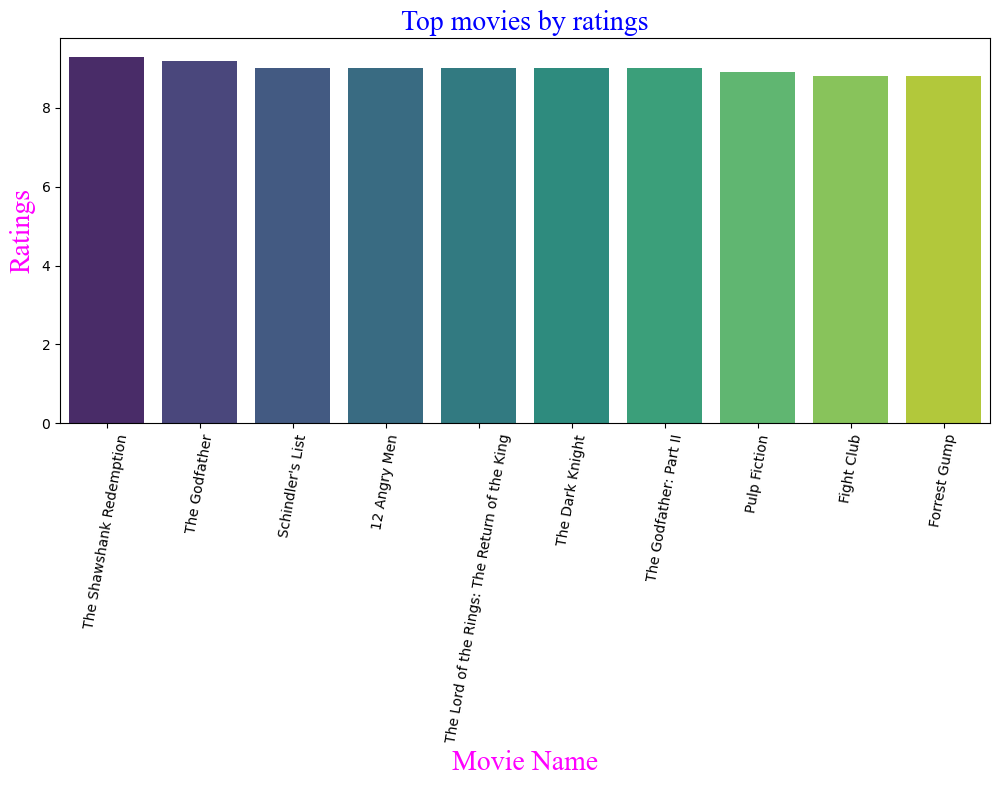

In [43]:
name=top_movie_ratings['movie_name']
value=top_movie_ratings['imdb_rating']

plt.figure(figsize=(12,5))
sns.barplot(x=name,y=value,palette='viridis')
plt.title('Top movies by ratings',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=80)
plt.ylabel('Ratings',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

The higest rated movie is 'the shawshank redemption' followed by 'The Godfather' etc

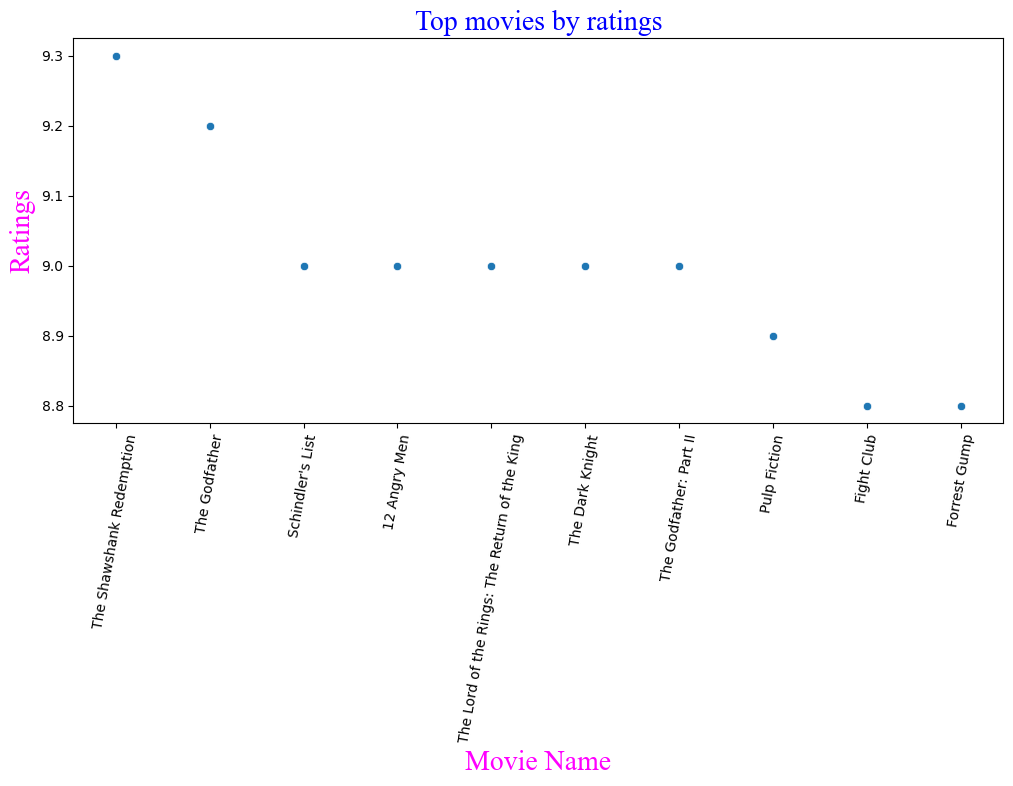

In [44]:
# using scatterplot 

plt.figure(figsize=(12,5))
sns.scatterplot(x=name,y=value,palette='viridis')
plt.title('Top movies by ratings',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=80)
plt.ylabel('Ratings',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

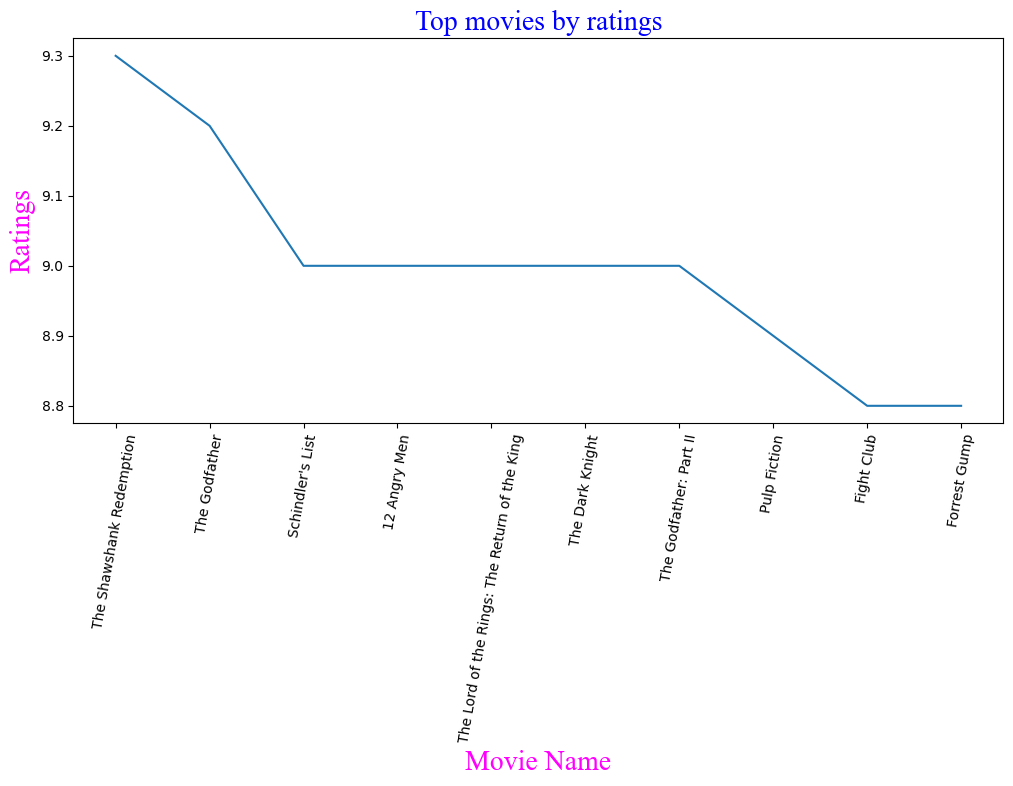

In [45]:
# line plot of movies vs ratings

plt.figure(figsize=(12,5))
sns.lineplot(x=name,y=value,palette='viridis')
plt.title('Top movies by ratings',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=80)
plt.ylabel('Ratings',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

Votes

In [46]:
# making a separate dataset using three columns visible in code below
votes=df[['movie_name','category','votes']]

In [47]:
# sort by total votes
top_voted=votes.sort_values(by='votes',ascending=False).head(15)
top_voted

,movie_name,category,votes
3,The Shawshank Redemption,R,2683302
10,The Dark Knight,PG-13,2656768
14,Inception,PG-13,2356293
55,Fight Club,R,2128902
40,Forrest Gump,PG-13,2082477
28,Pulp Fiction,R,2058574
98,The Matrix,R,1916083
15,The Lord of the Rings: The Fellowship of the Ring,PG-13,1878557
0,The Godfather,R,1860471
8,The Lord of the Rings: The Return of the King,PG-13,1849082


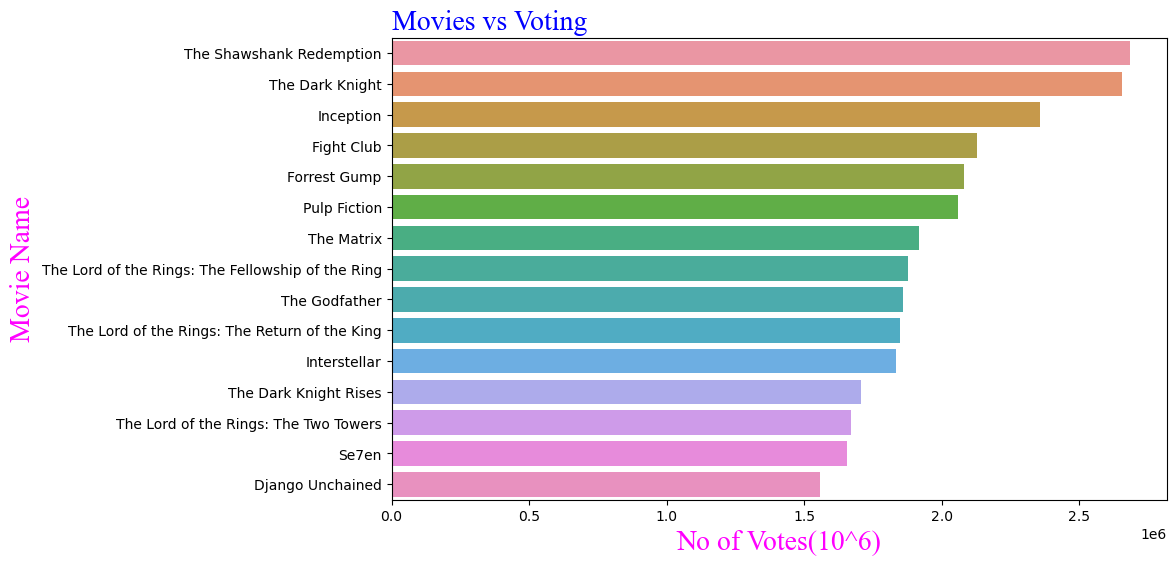

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_voted['votes'],y=top_voted['movie_name'])
plt.title('Movies vs Voting',loc='left',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('No of Votes(10^6)',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.ylabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'});

Gross Earning

In [49]:
# Movies with highest gross total

gross=df[['movie_name','gross_total']]
gross

,movie_name,gross_total
0,The Godfather,134.97
1,The Silence of the Lambs,130.74
2,Star Wars: Episode V - The Empire Strikes Back,290.48
3,The Shawshank Redemption,28.34
4,The Shining,44.02
...,...,...
94,The Usual Suspects,23.34
95,Cool Hand Luke,16.22
96,Eternal Sunshine of the Spotless Mind,34.40
97,City Lights,0.02


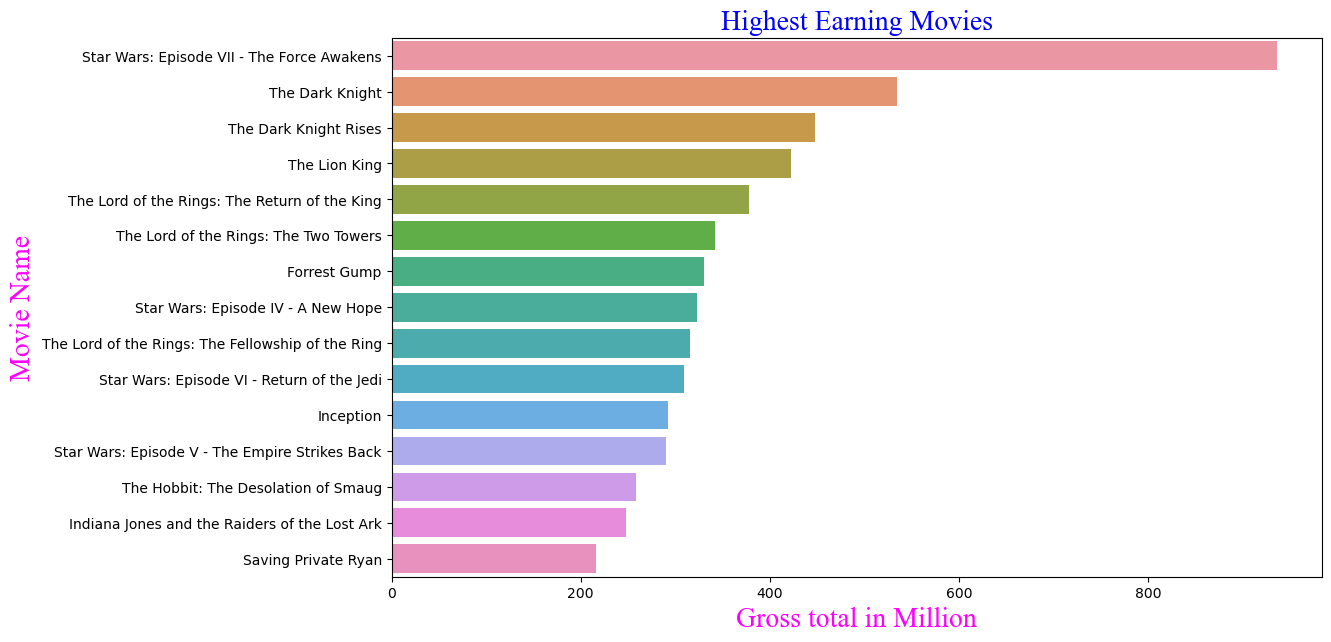

In [50]:
# sort values
top_movies_by_gross=gross.sort_values(by='gross_total',ascending=False).head(15)
name=top_movies_by_gross['movie_name']
value=top_movies_by_gross['gross_total']

# bar plot
plt.figure(figsize=(12,7))
sns.barplot(data=top_movies_by_gross,y=name,x=value)
plt.title('Highest Earning Movies',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Gross total in Million',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.ylabel('Movie Name',fontdict={'family':'times new roman','size':20,'color':'magenta'});

Star Wars: Episode V - The Empire Strikes Back has the highest Gross earning at over 800 million USD